In [26]:
import numpy as np
from pandas import DataFrame
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns
%matplotlib inline
# sns.set(rc={'figure.figsize':(8,6)})

# notebook to explore the q values
files = Path("/home/daniel/horeka-mount/DLRT/networks/tempdata")
# 4 files, need heatmaps from them
wq_df = pd.read_csv(files / "wq.csv").drop(columns=["Unnamed: 0"])
wtq_df = pd.read_csv(files / "wtq.csv").drop(columns=["Unnamed: 0"])
wqt_df = pd.read_csv(files / "wqt.csv").drop(columns=["Unnamed: 0"])
wtqt_df = pd.read_csv(files / "wtqt.csv").drop(columns=["Unnamed: 0"])

[Text(0.5, 1.0, "Compare to 1st epoch: Weight normal, Q's compared")]

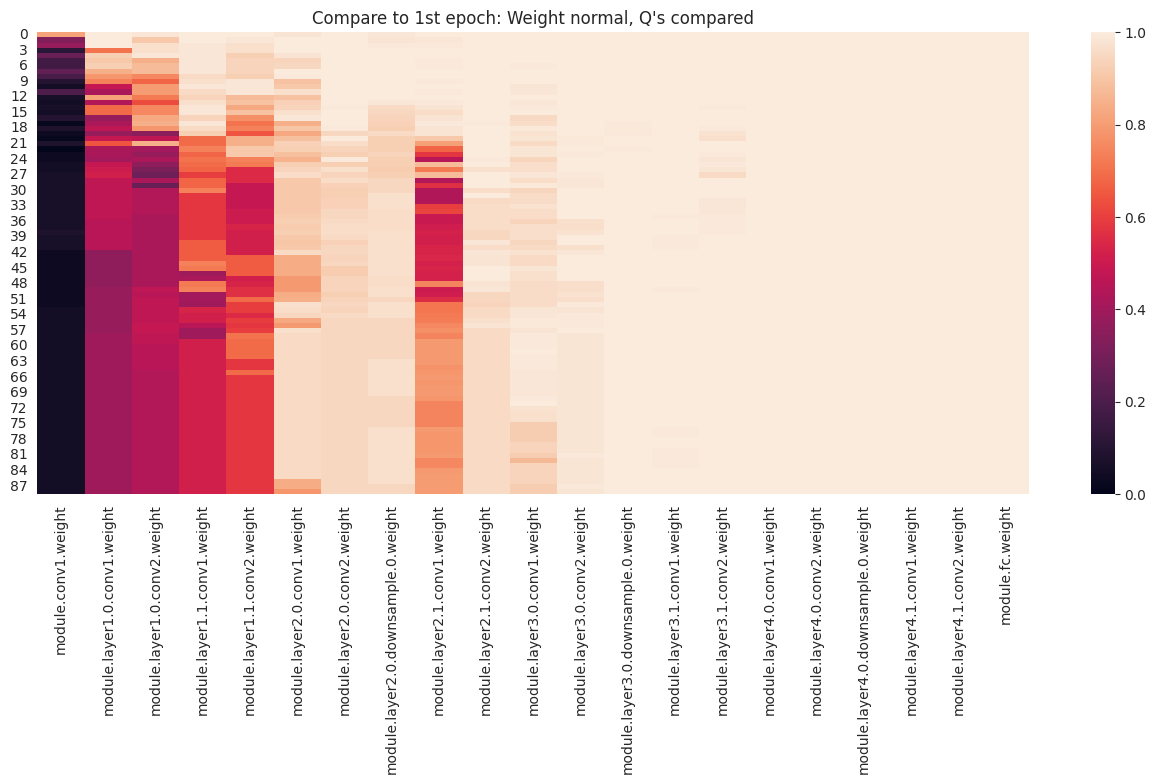

In [24]:
plt.figure(figsize=(16, 6))
sns.heatmap(wq_df, annot=False, vmin=0.0, vmax=1.0, norm=LogNorm()).set(title="Compare to 1st epoch: Weight normal, Q's compared")
# plt.title("Weight normal, Q's compared")
# plt.show()

[Text(0.5, 1.0, "Compare to 1st epoch: Weight transposed, Q's compared")]

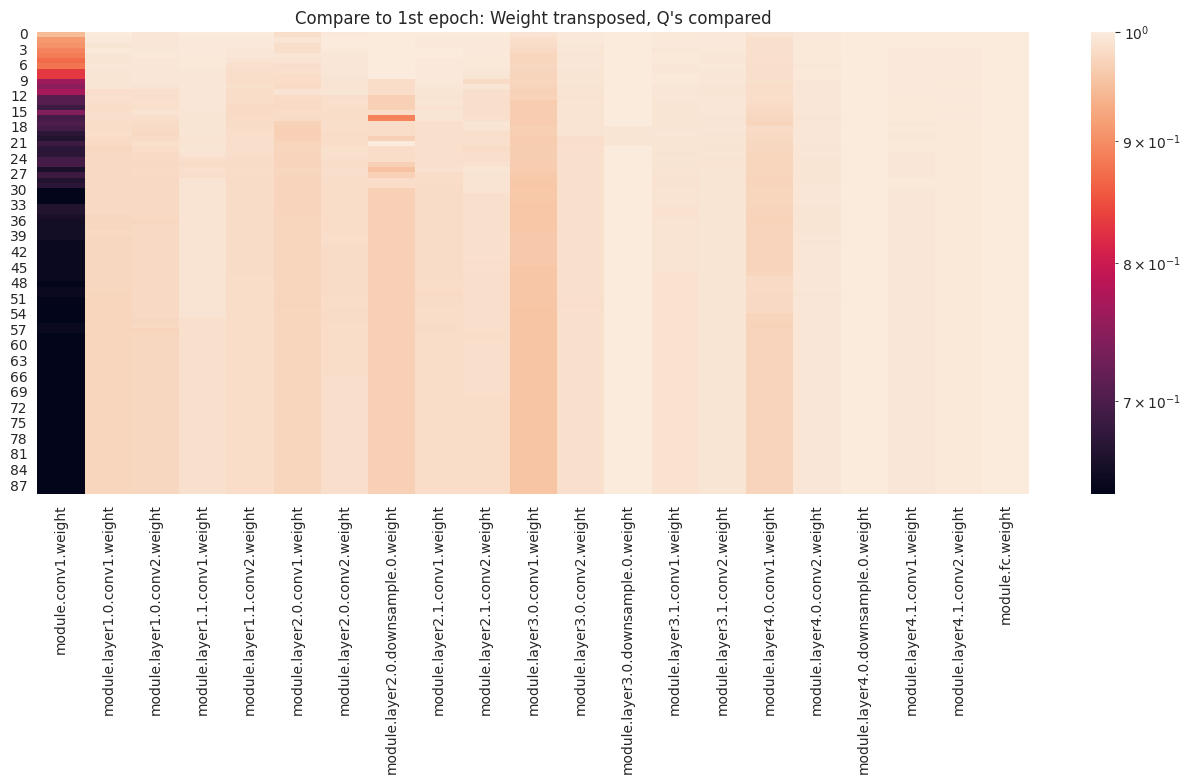

In [31]:
plt.figure(figsize=(16, 6))
sns.heatmap(wtq_df, annot=False, vmin=0.0, vmax=1.0, norm=LogNorm()).set(title="Compare to 1st epoch: Weight transposed, Q's compared")

[Text(0.5, 1.0, "Weight normal, Q.T's compared")]

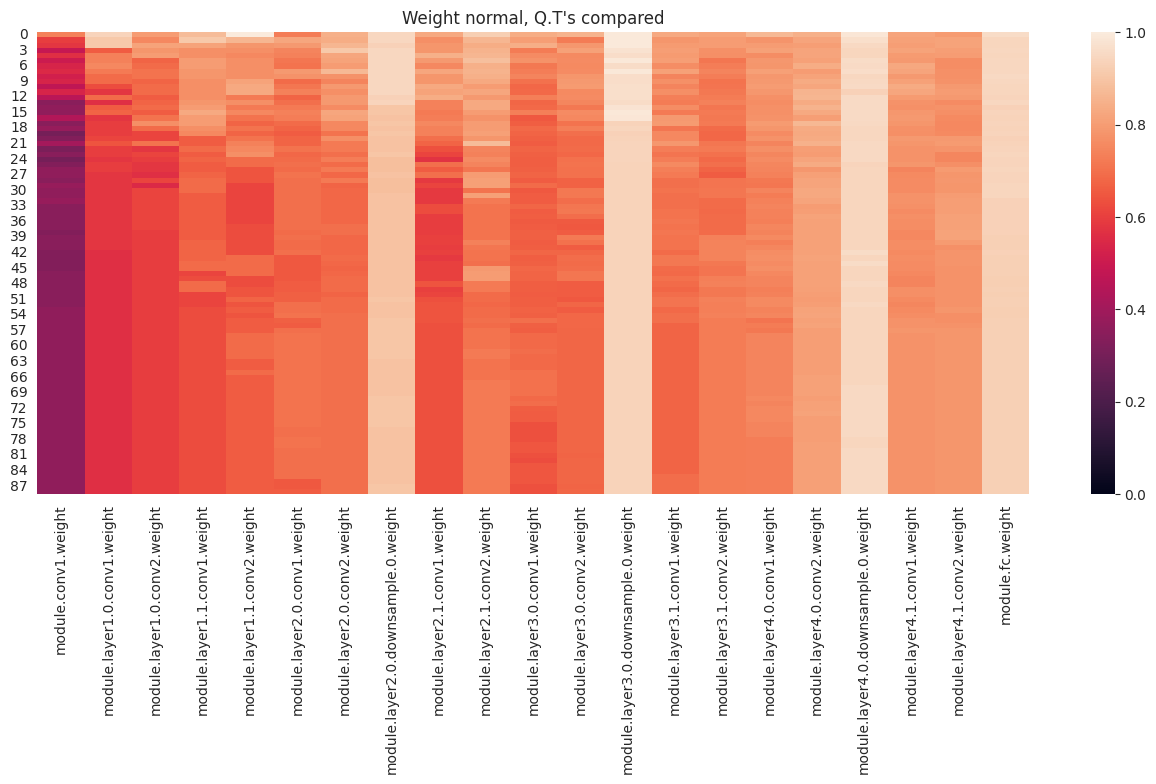

In [4]:
plt.figure(figsize=(16, 6))
sns.heatmap(wqt_df, annot=False, vmin=0.0, vmax=1.0).set(title="Compare to 1st epoch: Weight normal, Q.T's compared")

[Text(0.5, 1.0, "Compare to 1st epoch: Weight transposed, Q.T's compared")]

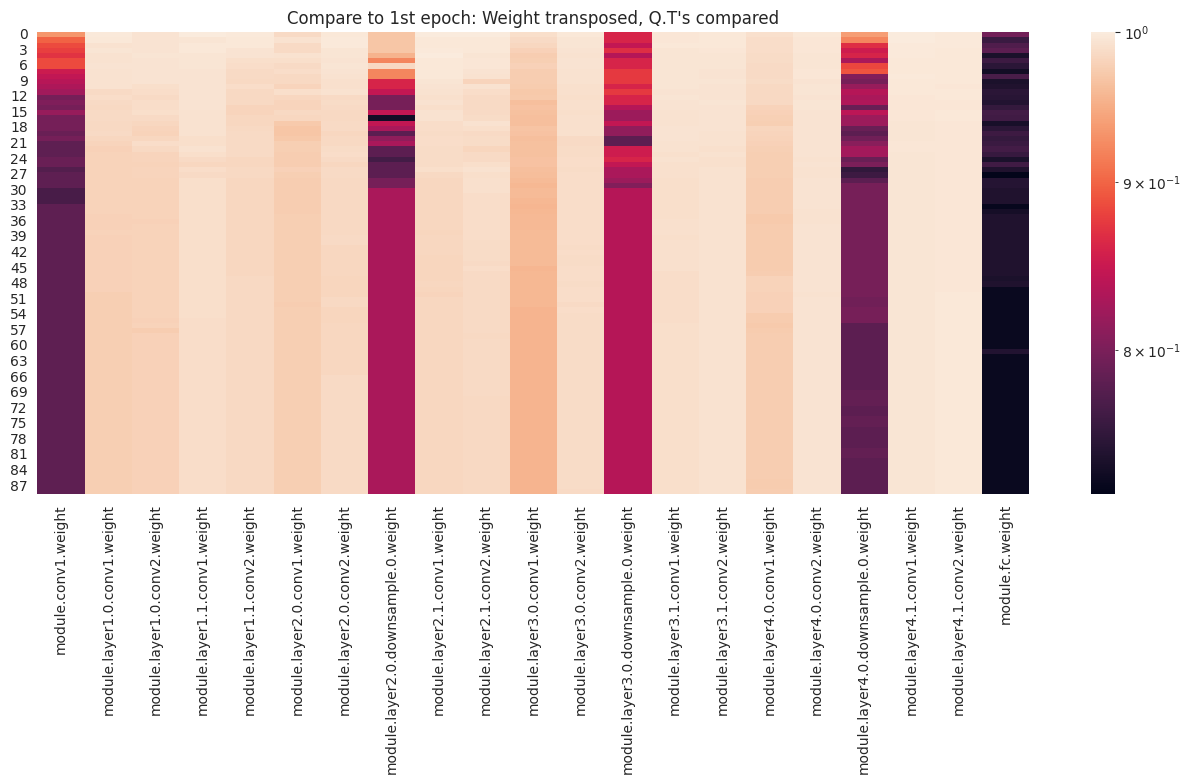

In [30]:
plt.figure(figsize=(16, 6))
sns.heatmap(wtqt_df, annot=False, vmin=0.0, vmax=1.0, norm=LogNorm()).set(title="Compare to 1st epoch: Weight transposed, Q.T's compared")

In [19]:
wq_df_previous = pd.read_csv(files / "wq-previous.csv")
wtq_df_previous = pd.read_csv(files / "wtq-previous.csv")
wqt_df_previous = pd.read_csv(files / "wqt-previous.csv")
wtqt_df_previous = pd.read_csv(files / "wtqt-previous.csv")

[Text(0.5, 1.0, "Compare to last epoch: Weight normal, Q's compared")]

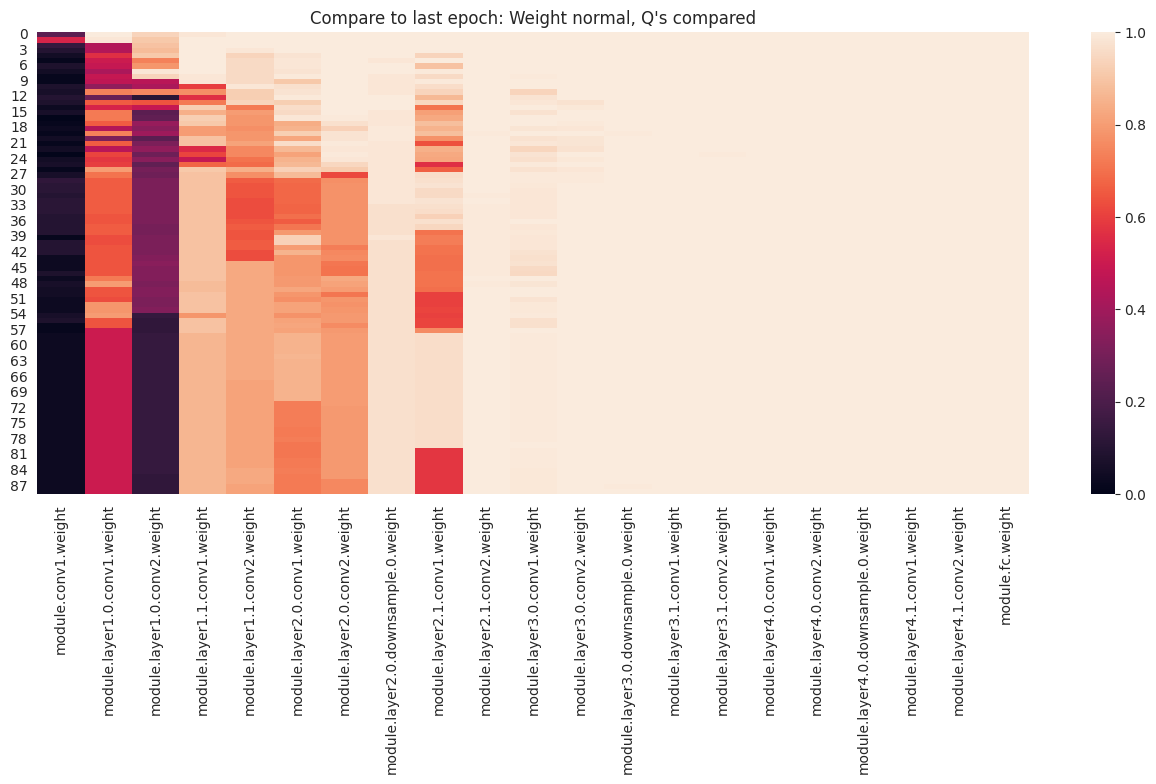

In [20]:
plt.figure(figsize=(16, 6))
sns.heatmap(wq_df_previous, annot=False, vmin=0.0, vmax=1.0).set(title="Compare to last epoch: Weight normal, Q's compared")

[Text(0.5, 1.0, "Compare to last epoch: Weight transposed, Q's compared")]

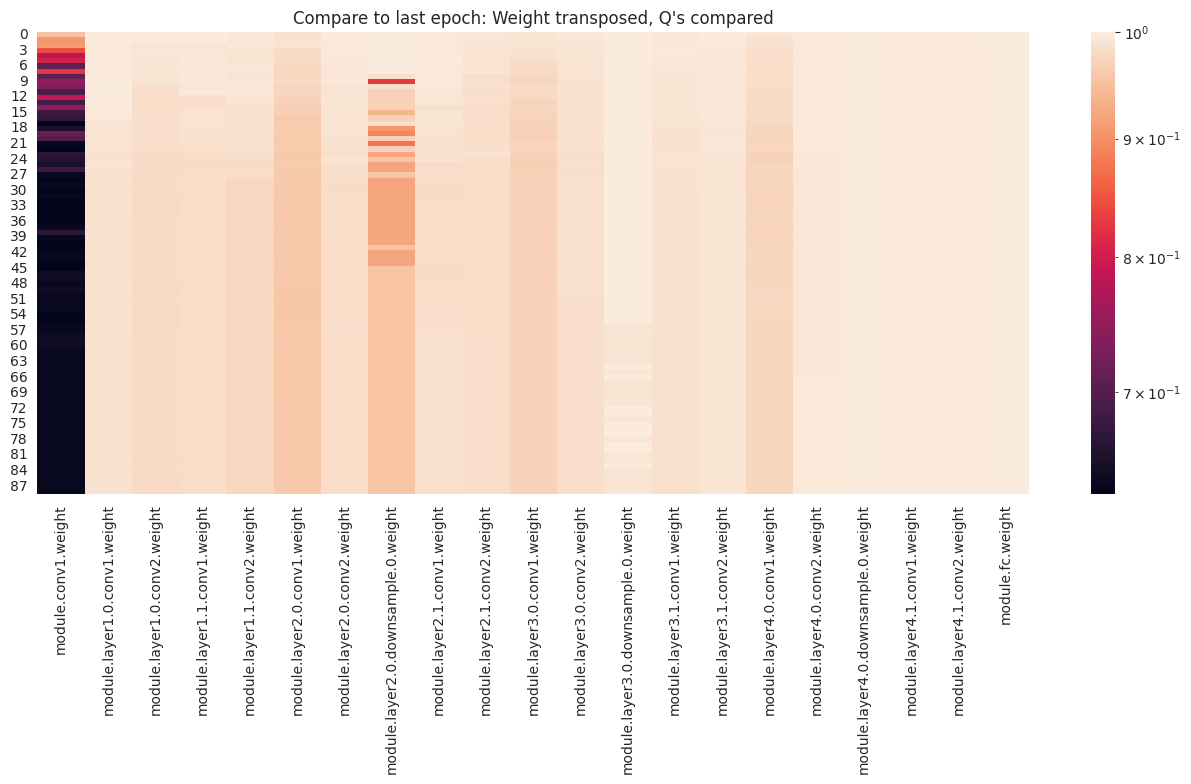

In [32]:
plt.figure(figsize=(16, 6))
sns.heatmap(wtq_df_previous, annot=False, vmin=0.4, vmax=1.0, norm=LogNorm()).set(title="Compare to last epoch: Weight transposed, Q's compared")

[Text(0.5, 1.0, "Compare to last epoch: Weight normal, Q.T's compared")]

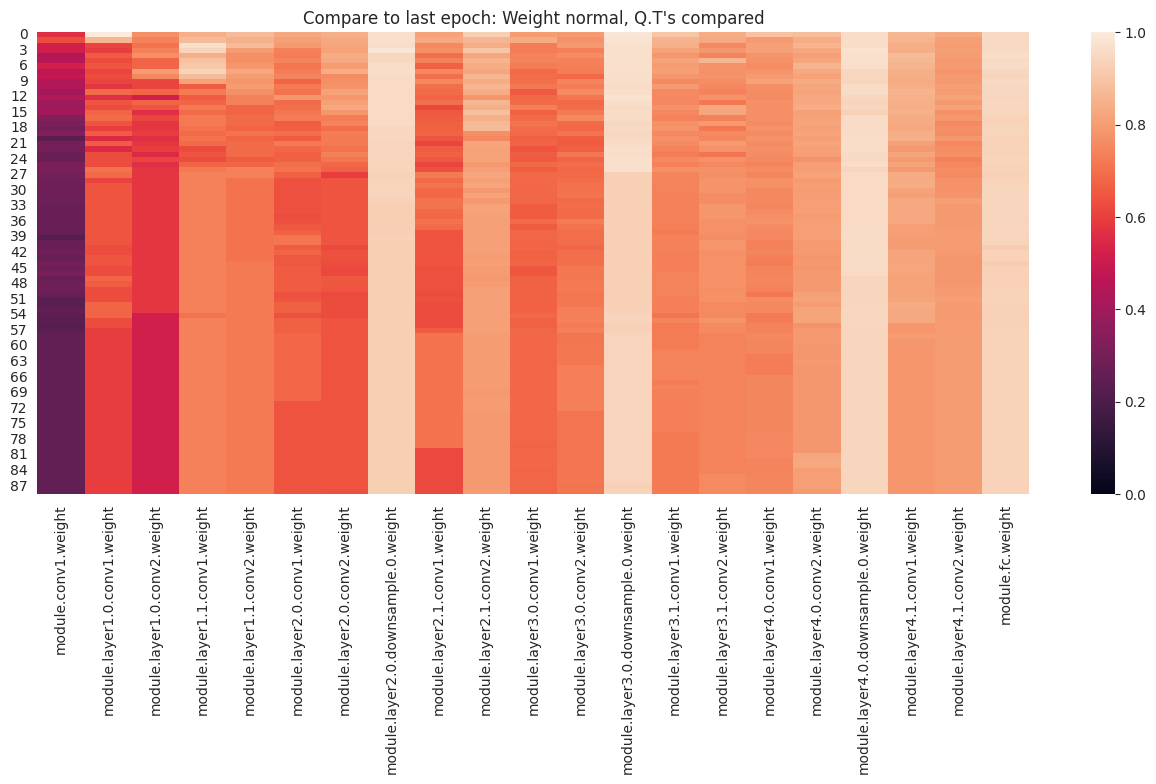

In [22]:
plt.figure(figsize=(16, 6))
sns.heatmap(wqt_df_previous, annot=False, vmin=0.0, vmax=1.0).set(title="Compare to last epoch: Weight normal, Q.T's compared")

[Text(0.5, 1.0, "Compare to last epoch: Weight transposed, Q.T's compared")]

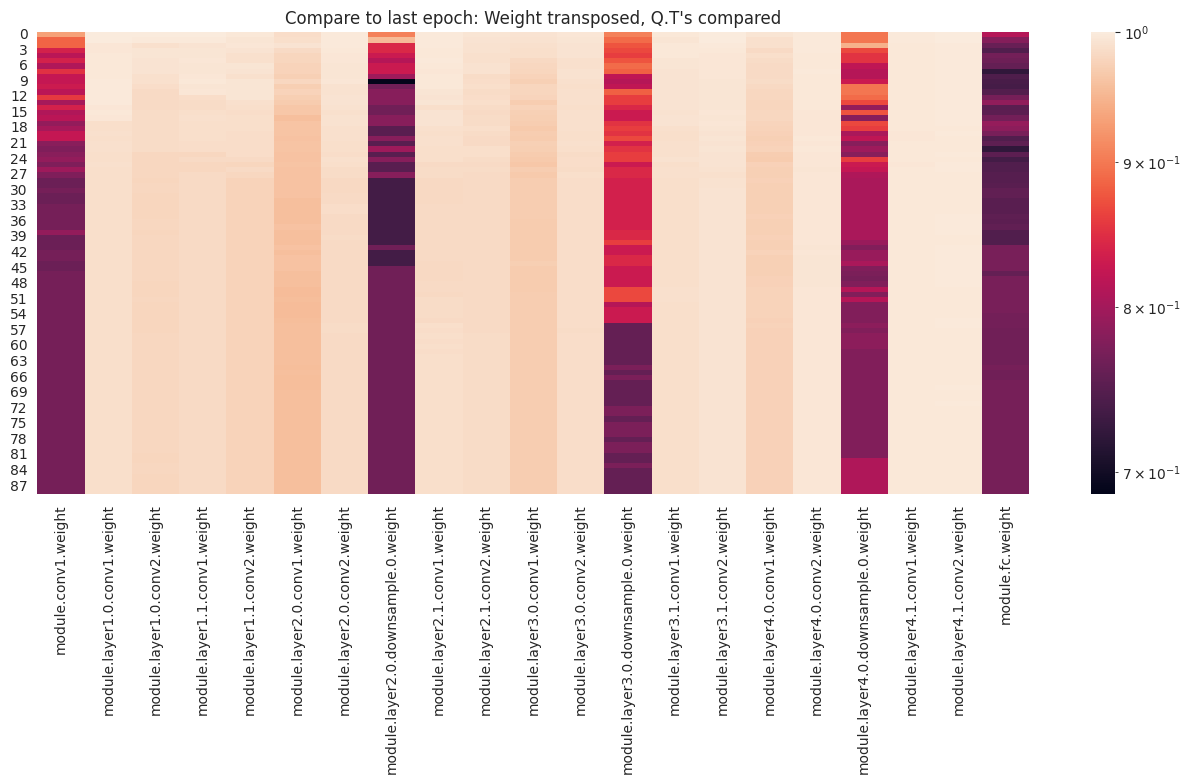

In [29]:
plt.figure(figsize=(16, 6))
sns.heatmap(wtqt_df_previous, annot=False, vmin=0.0, vmax=1.0, norm=LogNorm()).set(
    title="Compare to last epoch: Weight transposed, Q.T's compared"
)

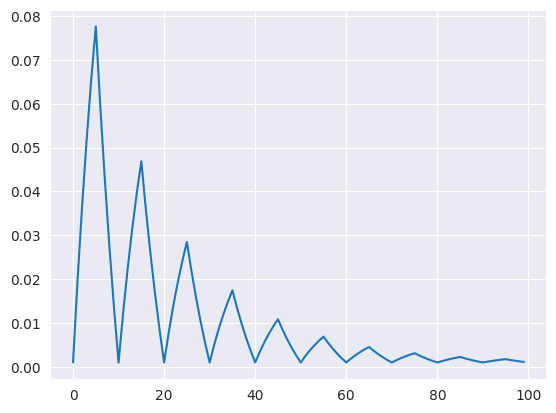

In [12]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.95)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)